# EXPLORATORY DATA ANALYSIS IN BANK TELEMARKETING

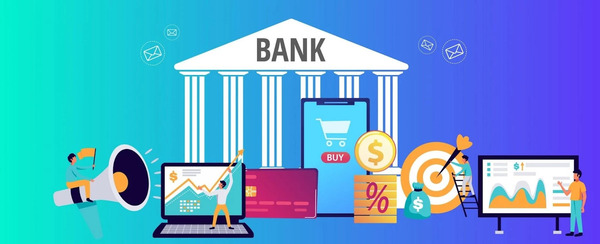

Welcome to <b>the exploratory data analysis in bank marketing</b>. This is the preliminary analysis of positive responses (term deposits) to direct calls from the bank. During the work, the factors including client demographics, and financial context attributes are analyzed to determine their behavior (whether they desire to deposit money). The skills of <i>importing, cleaning, manipulating and visualizing data</i> are used through Python in this analysis.

## Materials and methods

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution, based on "Bank Marketing" UCI <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing"><em>dataset</em></a>
<p>
The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb </p>
<p>
Our objectives involve transforming disorganized data into suitable formats for analysis, aiming to address pivotal inquiries such as:</p>
<ul>
<li><i>What are the demographic characteristics of the group of potential customers wishing to deposit money?</i></li>
<li><i>Do housing loan and personal loan affect their decision to subcribe a deposite term? </i></li>
<li><i>How should customers be approached by call (duration, numbers of campaigns) to achieve effectiveness?? </i></li>
</ul>
<p>
In addition, we construct data visualization charts to maximize the efficacy of our analyzed findings </p>

## Outline

<p>1. Importing Modules </p>
<p>2. Importing and Filtering Data </p>
<p>3. Cleaning Data </p>
4. Comprehensive Dataframe (DF) Analysis
<p><ul>
<li><i>4.1. Output Variable - The share of the attracted clients</i></li>
<li><i>4.2. Input Variables</i></li>
</ul>
</p>
5. Exploratory Data Analysis (EDA)
<p><ul>
<li><i>5.1. EDA of demographic variables to the output variable </i></li>
<li><i>5.2. EDA of financial context variables to the output variable</i></li>
<li><i>5.2. EDA of Tekemarketing activities variables to the output variable</i></li>
</ul>
</p>
6. Recommendations

***

## 1. Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_708/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Importing And Filtering Data

In [3]:
df = pd.read_csv('../data/bank-additional-full.csv', sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Print the shape of the dataset
print("The dataset includes " + str(df.shape[1])+ " columns and " + str(df.shape[0]) + " objects")

The dataset includes 21 columns and 41188 objects


We have our data! However, to filter and analyze data quickly, we don't need information from all of the columns, so let's create a new DataFrame <code>telemarketing</code> containing only <code>age</code>, <code>job</code>, <code>marital</code>, <code>education</code>, <code>housing</code>, <code>loan</code>, <code>duration</code>, <code>campaign</code>, and the output variable <code>y</code>.
<p>Let's put our data subsetting skills to work!</p>

In [5]:
# Select only the columns for the analysis
telemarketing = df[['age', 'job', 'marital', 'education', 'housing','loan','duration','campaign','y']]

#Overview the new dataset
print(telemarketing.head())
print(telemarketing.info())

   age        job  marital    education housing loan  duration  campaign   y
0   56  housemaid  married     basic.4y      no   no       261         1  no
1   57   services  married  high.school      no   no       149         1  no
2   37   services  married  high.school     yes   no       226         1  no
3   40     admin.  married     basic.6y      no   no       151         1  no
4   56   services  married  high.school      no  yes       307         1  no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   housing    41188 non-null  object
 5   loan       41188 non-null  object
 6   duration   41188 non-null  int64 
 7   campaign   41188 non-null  int64 
 8   y          41188 non-null  object
d

We can split these columns into four groups
*   <b>Group 1: Demographic Input Features</b>
1.  `age` - client's age in years (numeric)
2.  `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3.  `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4.  `education` - client's education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
*   <b>Group 2: Financial Context Input Features</b>
5.  `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
6.  `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
*   <b>Group 3: Telemarketing Input Features</b>
7. `duration` - last contact duration, in seconds (numeric).
8. `campaign` - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
*   <b>Group 4: Output feature (desired target)</b>
9. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)

## 3. Cleaning Data

In [6]:
# Checking for any missing values
print(telemarketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   housing    41188 non-null  object
 5   loan       41188 non-null  object
 6   duration   41188 non-null  int64 
 7   campaign   41188 non-null  int64 
 8   y          41188 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB
None


As we can see, the dataset is full, no pass (<code>non-null</code>), so there is no need to fill the gaps. The dataset contains 3 integer (<code>int64</code>), and 6 categorical and binary (<code>object</code>) features. Next, we need to look at if there are any outliers inside the dataset.

In [7]:
# Checking any outliers from numeric variables
print(telemarketing.describe())

               age      duration      campaign
count  41188.00000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593
std       10.42125    259.279249      2.770014
min       17.00000      0.000000      1.000000
25%       32.00000    102.000000      1.000000
50%       38.00000    180.000000      2.000000
75%       47.00000    319.000000      3.000000
max       98.00000   4918.000000     56.000000


Among the 3 numeric variables we just observed, only the <code>duration</code> variable has a <code>max</code> value that differs too much from the <code>median</code> value. A boxplot plot represents the distribution as follows:

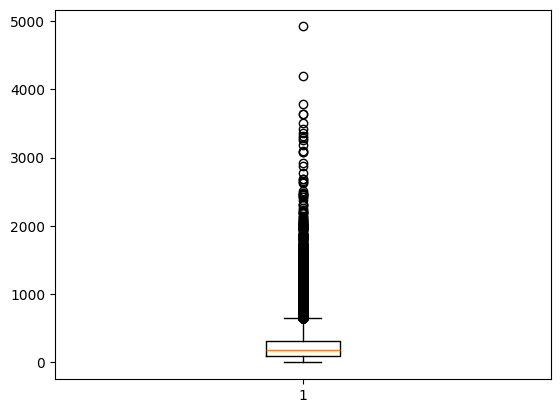

In [8]:
plt.boxplot(telemarketing['duration'])
plt.show()

Two calls lasting more than 4000 seconds were found, however they could not be identified as outliers because there is no limit for calls from the bank specified.
<p>
Now we need to look at the statistics on non-numeric features

In [9]:
# Checking any outliers from non-numeric variables
print(telemarketing.describe(include="object"))

           job  marital          education housing   loan      y
count    41188    41188              41188   41188  41188  41188
unique      12        4                  8       3      3      2
top     admin.  married  university.degree     yes     no     no
freq     10422    24928              12168   21576  33950  36548


In [10]:
# Checking 'job' distribution
telemarketing['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [11]:
# Checking the atracted clients distribution
telemarketing['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

There are no outliers recorded among non-numeric variables

## 4. Comprehensive Dataframe Analysis

This section allows us to overview the outstanding features of the data such as:
<ul>
<li><i>Ratio of clients desiring to subscribe a term deposit</i></li>
<li><i>Age distribution and average age of all customers </i></li>
<li><i>Age division in the marital status group </i></li>
<li><i>Overview of telemarketing activities through duration and campaigns</i></li>
</ul>

### 4.1. Output Variable - The share of the attracted clients

The output variable - `y` is a boolean with 2 values - 'yes' or 'no'. We need to change them to two numeric categories: `1` for 'yes' and `0` for 'no

In [12]:
# Map the dictionary to the existing dataframe for 'y' variable
d = {'no': 0, 'yes': 1}
telemarketing.loc[:,'y'] = telemarketing.loc[:,'y'].map(d)


# Convert 'y' columns to categorical
telemarketing.loc[:,'y']=telemarketing.loc[:,'y'].astype('category')
telemarketing.info()

# Review the dataframe after changes
print(telemarketing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   housing    41188 non-null  object
 5   loan       41188 non-null  object
 6   duration   41188 non-null  int64 
 7   campaign   41188 non-null  int64 
 8   y          41188 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB
   age        job  marital    education housing loan  duration  campaign  y
0   56  housemaid  married     basic.4y      no   no       261         1  0
1   57   services  married  high.school      no   no       149         1  0
2   37   services  married  high.school     yes   no       226         1  0
3   40     admin.  married     basic.6y      no   no       151         1  0
4   56   services  married  high.

In [13]:
# The share of the attracted clients
print(telemarketing['y'].value_counts())
print(telemarketing['y'].value_counts(normalize=True))

y
0    36548
1     4640
Name: count, dtype: int64
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


4640 clients (11.3%) of 41188 issued a term deposit

### 4.2. Input Variables

<b>First of all</b>, we need to look at clients' <code>age</code> and <code>marital</code> distribution

In [14]:
# Mean value of age
print("The average age of the observed group of people is {} years old".format(telemarketing['age'].mean().round(1)))

The average age of the observed group of people is 40.0 years old


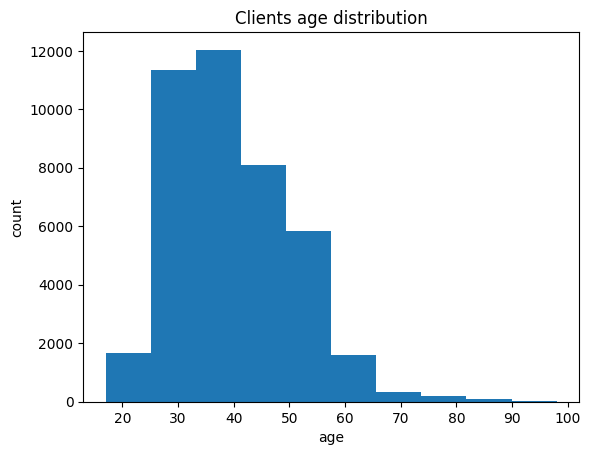

In [15]:
# Histogram of age
plt.hist(telemarketing['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.title('Clients age distribution')
plt.show()

It can be seen that the largest group of people in this data is between the ages of 25 and 50. Also, ưe need to look at how age is distributed within each type of marital status

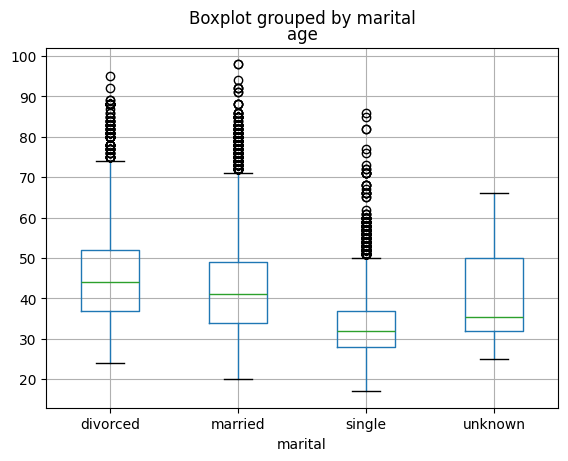

In [17]:
telemarketing.boxplot(column='age',
           by = 'marital')
plt.show()

The plot shows that unmarried people are on average younger (around 33 years old) than divorced (around 44) and married (around 40) ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.
<p>
<b>Next</b>, we need to go through the financial context features (<code>housing</code> and <code>loan</code>)
</p>

In [29]:
# Identify the percentage of housing loan and private loan
print(telemarketing['housing'].value_counts(normalize=True))
print(telemarketing['loan'].value_counts(normalize=True))

housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64
loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: proportion, dtype: float64


We can see while 52.38% of clients are having housing loan, 82.43% of them are having private loan
<p>
Finally, we need to find whether there is any correlation amongst <code>age</code> and telemarketing attributes <code>duration</code> and <code>campaign</code>
</p>

In [50]:
#Correlation between 'age' and 'duration'
print(np.corrcoef(telemarketing['age'],telemarketing['duration'])[0,1])
#Correlation between 'age' and 'campaign'
print(np.corrcoef(telemarketing['age'],telemarketing['campaign'])[0,1])

-0.0008657050101409428
0.004593580493413423


The results show that there is an insignificant relationship (nearly close to 0) between <code>duration</code>, <code>campaign</code> and <code>age</code>

In [66]:
avg_duration_sec = telemarketing['duration'].agg(['mean'])
avg_duration_min = round(avg_duration_sec/60,2)
print(avg_duration_min)
avg_campaign = telemarketing['campaign'].agg(['mean'])
print(round(avg_campaign),2)

mean    4.3
Name: duration, dtype: float64
mean    3.0
Name: campaign, dtype: float64 2


Also, the average duration of calls to clients is <b>4.3</b> hours, while there are <b>3</b> calls approaching to clients within this campaign.

## 5. Exploratory Data Analysis (EDA)
<p> In this section, we will deeply dig into the effect of output variables on the input variable. The analysis will answer the question: <i><b>What should the bank do to increase the number of clients who desire to subscribe a term deposit?</i></b></p>

### 5.1. EDA of demographic variables to the output variable
<p> a. <code>age</code> varible </p>

In [74]:
print("The clients who desire to subcribe a deposit term have average age {} years old".format(telemarketing['age'][telemarketing['y']==1].mean().round(1)))

The clients who desire to subcribe a deposit term have average age 40.9 years old


Compared to the average age of all clients - 40 (<i>section 4.2</i>), the attracted clients tend to be slightly older. However, the customers whom the bank should approach to get more term deposit subscriptions should be aged from 26 to 38 (<i>see the below histogram of the attracted clients for more details</i>)

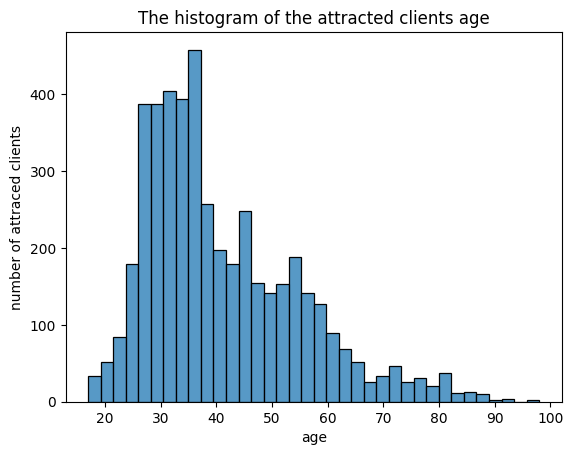

In [72]:
sns.histplot(data=telemarketing[telemarketing['y']==1], x='age')
plt.xlabel('age')
plt.ylabel('number of attraced clients')
plt.title('The histogram of the attracted clients age')
plt.show()

<p> b. <code>job</code> varible </p>

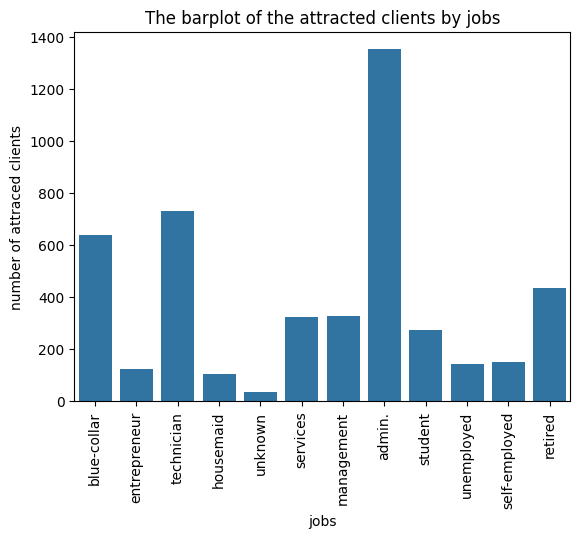

In [84]:
sns.countplot(data=telemarketing[telemarketing['y']==1], x='job')
plt.xlabel('jobs')
plt.xticks(rotation=90)
plt.ylabel('number of attraced clients')
plt.title('The barplot of the attracted clients by jobs')
plt.show()

The bank should focus on the customers from the sections of <b><i>adminstration, technician, blue-collar and retired</i></b>
<p> c. <code>education</code> varible </p>

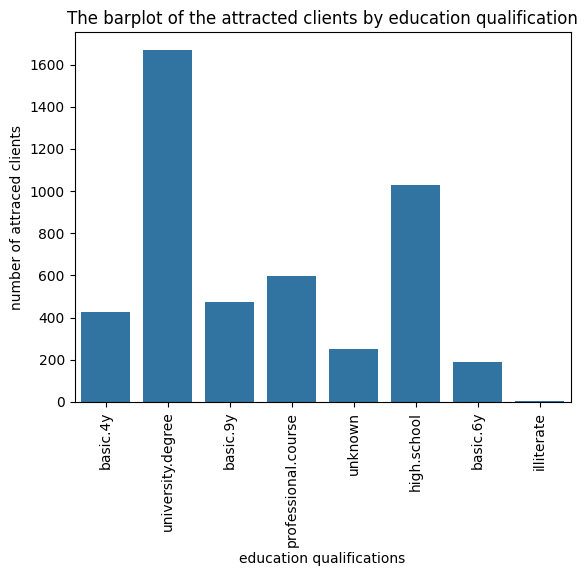

In [86]:
sns.countplot(data=telemarketing[telemarketing['y']==1], x='education')
plt.xlabel('education qualifications')
plt.xticks(rotation=90)
plt.ylabel('number of attraced clients')
plt.title('The barplot of the attracted clients by education qualification')
plt.show()

The bank should focus on the customers having the qualifications of <b><i>high school </i></b> and <b><i>university</i></b>
<p> d. <code>marital</code> varible </p>

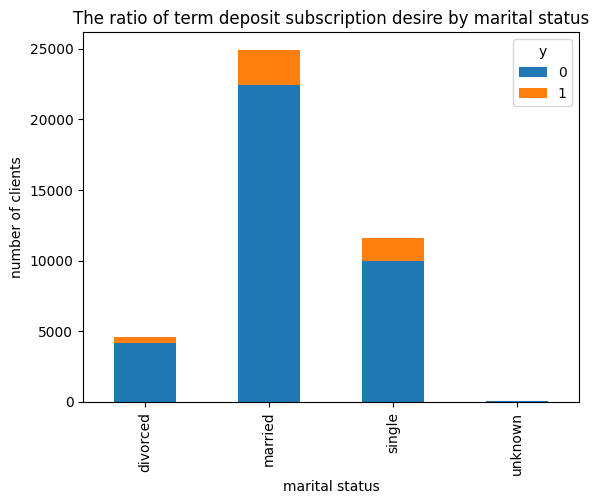

In [90]:
# The bar chart for the ratio of term deposit subscription desire by marital status
pd.crosstab(telemarketing['marital'], telemarketing['y']).plot(kind='bar', stacked=True)
plt.xlabel('marital status')
plt.ylabel('number of clients')
plt.title('The ratio of term deposit subscription desire by marital status')
plt.show()

In [88]:
# Determine the exact proportion of term deposit subscription desire by marital status
pd.crosstab(telemarketing['marital'], telemarketing['y'], normalize='index')

y,0,1
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


From the chart and table, we can see that <i>Single</i> people, albeit to ranking 2nd in the total number of the attracted clients, have the highest preference (15% say Yes) of depositing money. So the bank should focus on this customer section

### 5.2. EDA of financial context variables to the output variable
<p> a. <code>housing</code> varible </p>

In [92]:
# Determine the exact proportion of term deposit subscription desire by housing loan status
pd.crosstab(telemarketing['housing'], telemarketing['y'], normalize='index')

y,0,1
housing,,
no,0.891204,0.108796
unknown,0.891919,0.108081
yes,0.883806,0.116194


It can be seen that there is not a big difference between the proportion of people with home debt who want to deposit money and those who do not have home debt. We can move on this variable.
<p> b. <code>loan</code> varible </p>

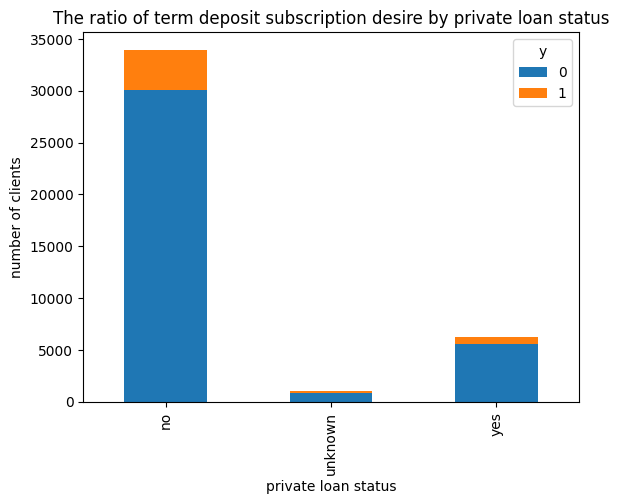

In [94]:
# The bar chart for the ratio of term deposit subscription desire by private loan status
pd.crosstab(telemarketing['loan'], telemarketing['y']).plot(kind='bar', stacked=True)
plt.xlabel('private loan status')
plt.ylabel('number of clients')
plt.title('The ratio of term deposit subscription desire by private loan status')
plt.show()

The chart clearly shows that people without personal loan are willing to deposit money in the bank. That means the bank should not approach customers with private debt.

### 5.3. EDA of Telemarketing activities variables to the output variable

In [97]:
# Determine mean and median values for 'duration' and 'campaign' variables
telemarketing[telemarketing['y']==1][['duration','campaign']].agg(['mean','median'])

,duration,campaign
mean,553.191164,2.051724
median,449.000000,2.000000


The results show that calls to customers wanting to deposit money usually last about <b>449</b> seconds (approximately 8 minutes) and they should be reached <b>twice</b> in a campaign. Although there is no correlation between duration and customer behavior, the above values are the basis for setting standards for telemarketing campaigns.

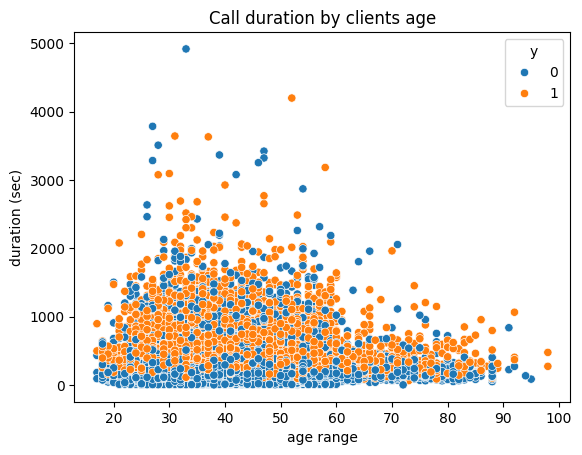

In [100]:
# Create a scatter plot of duration versus age
sns.scatterplot(data=telemarketing, x='age', y='duration',hue='y')

# Create a title and axis labels
plt.title('Call duration by clients age')
plt.xlabel('age range')
plt.ylabel("duration (sec)")

# Show the plot
plt.show()

## 6. Recommendations
<p> Here are some bullet points to help the bank complete the customer characteristics for targeting potential customers through telemarketing campaigns: </b>
<ul>
<li><i>Age range: 26 to 38 years old</i></li>
<li><i>Marital status: Single </i></li>
<li><i>Education level: Graduated from high school or university </i></li>
<li><i>Occupation: Working in administrative positions, as technicians, or in blue-collar jobs </i></li>
<li><i>Financial status: Little to no personal debt </i></li>
</ul>
<p>
Regarding the call standardized strategies, the call should be:</p>
<ul>
<li><i>Last approximately 8 minutes each</i></li>
<li><i>Reached twice during the campaign to discuss deposit opportunities </i></li>
</ul>
